# Comparing phase-linking to multi-looked interferograms

Here we show the visual difference in interferogram quality between simple multi-looked interferograms and the outputs of phase linking. We simulated a stack of SLCs acquired with 12-day spacing and added decorrelation noise to each pixel following the exponential decay model $\rho(t) = \exp(-t / 60)$ (that is, a decay constant of 60 days with 0 correlation at time infinity).

<div class="alert alert-info">

**Intuition**
- When creating interferograms from two single-look complex (SLC) images, multi-looking is usually performed to reduce noise, where pixels in small windows are averaged to produce a coarser-resolution interferogram with lower noise.
- A Goldstein-Werner filter can also be used to smooth and further reduce noise; this works best for low-to-medium noise interferograms.
- Since phase linking uses a whole stack of SLCs and forms all possible interferograms, the output interferograms can be higher quality than multi-looked interferograms with the same temporal baseline.

</div>


In [16]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from dolphin import goldstein, io, utils

In [17]:
p = Path("synthetic-demo/")
pl_ifg_paths = sorted((p / "interferograms").glob("2*.int.tif"))
nl1 = 3
nl2 = 12

def compare_pl_ifgs(slc_band: int):
    ifg_idx = slc_band - 2
    cur_ifg_path = pl_ifg_paths[ifg_idx]
    ifg_pl = io.load_gdal(cur_ifg_path)

    slc1 = io.load_gdal(p / "phase_linking/slc_stack.vrt", band=1)
    slc2 = io.load_gdal(p / "phase_linking/slc_stack.vrt", band=slc_band)
    ifg_1 = utils.take_looks(slc1 * slc2.conj(), nl1, nl1)
    ifg_2 = utils.take_looks(slc1 * slc2.conj(), nl2, nl2)
    ifg_goldstein = goldstein.goldstein(ifg_2, alpha=0.5)
    return ifg_1, ifg_2, ifg_goldstein, ifg_pl

In [18]:
def show_idx(idx):
    ifg_1, ifg_2, ifg_goldstein, ifg_pl = compare_pl_ifgs(idx)
    fig, axes = plt.subplots(ncols=4, figsize=(10, 3))
    titles = [f"{nl1}x{nl1} looks", f"{nl2}x{nl2} looks", f"{nl2}x{nl2} + Goldstein", "Phase Linking (121 SHPs)"]
    ifgs = [ifg_1, ifg_2, ifg_goldstein, ifg_pl]
    for ax, ifg, t in zip(axes, ifgs, titles):
        ax.imshow(np.angle(ifg), cmap="twilight", interpolation="none")
        ax.set_axis_off()
        ax.set_title(t)

    fig.suptitle(pl_ifg_paths[idx].stem)
    fig.tight_layout()
    plt.show()

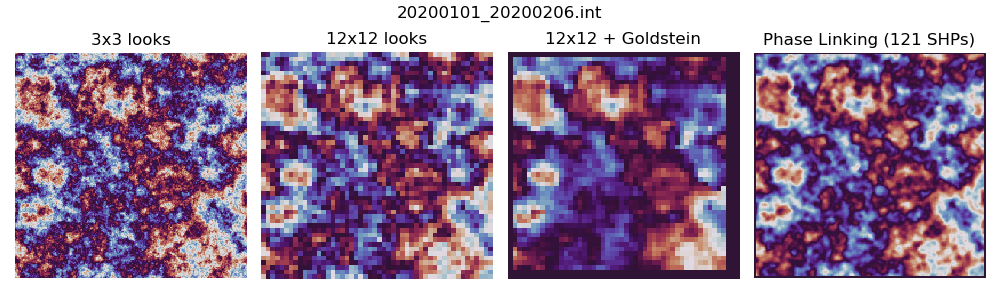

In [19]:
show_idx(2)

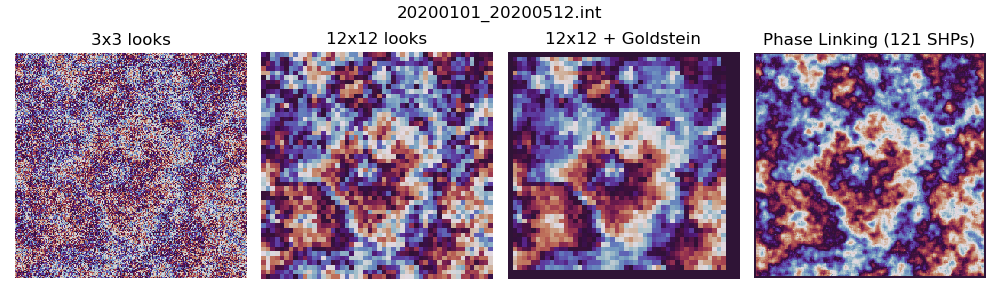

In [20]:
show_idx(10)

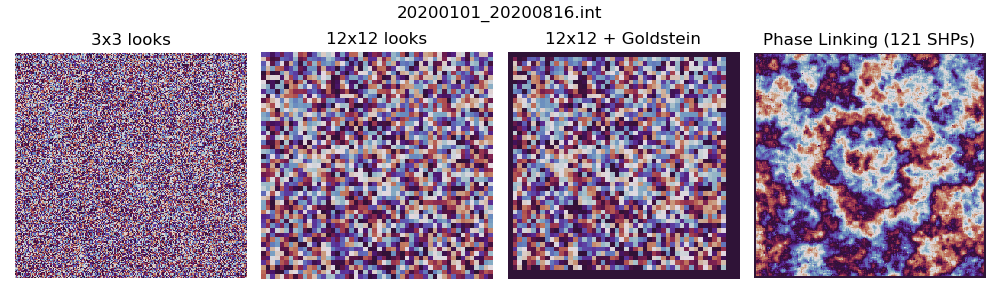

In [21]:
show_idx(18)